In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir('C:\\ALabs\python case study\\Case Study 1 - Retail Case Study')


<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\vansh\AppData\Local\Temp\ipykernel_8160\2391762534.py:1: SyntaxWarning: invalid escape sequence '\p'
  os.chdir('C:\\ALabs\python case study\\Case Study 1 - Retail Case Study')


In [3]:
customer_df=pd.read_csv('Customer.csv')
prod_cat_info_df=pd.read_csv('prod_cat_info.csv')
Transactions_df=pd.read_csv('Transactions.csv')

In [4]:
Transactions_df.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop


In [5]:
prod_cat_info_df.head(2)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [6]:
customer_df.head(2)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0


In [7]:
prod_cat_info_df.rename(columns={'prod_sub_cat_code':'prod_subcat_code'},inplace=True)

In [8]:
customer_df.rename(columns={'customer_Id':'cust_id'},inplace=True)

In [9]:
data_df= pd.merge(left= Transactions_df, right=customer_df, how= 'left', on= 'cust_id')

In [10]:
Customer_Final_df= pd.merge(left= data_df, right=prod_cat_info_df, how= 'left', on= ['prod_subcat_code', 'prod_cat_code'])

In [11]:
Customer_Final_df.head(4)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,11-05-1973,F,8.0,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8.0,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,08-06-1981,M,3.0,Home and kitchen,Bath


### Shape of dataset

In [13]:
print('The table customer_final_df conatains', Customer_Final_df.shape[0], 'rows and', Customer_Final_df.shape[1], 'columns')

The table customer_final_df conatains 23053 rows and 15 columns


### Datatype/information

In [15]:
Customer_Final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
 10  DOB               23053 non-null  object 
 11  Gender            23044 non-null  object 
 12  city_code         23045 non-null  float64
 13  prod_cat          23053 non-null  object 
 14  prod_subcat       23053 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 2.6+ MB


## Correcting Dtatypes

In [17]:
Customer_Final_df.tran_date=Customer_Final_df.tran_date.str.replace('/', '-')

In [18]:
Customer_Final_df.tran_date=pd.to_datetime(Customer_Final_df.tran_date, format= '%d-%m-%Y')

In [19]:
Customer_Final_df.DOB=pd.to_datetime(Customer_Final_df.DOB, format= '%d-%m-%Y')

In [20]:
Customer_Final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23053 non-null  int64         
 1   cust_id           23053 non-null  int64         
 2   tran_date         23053 non-null  datetime64[ns]
 3   prod_subcat_code  23053 non-null  int64         
 4   prod_cat_code     23053 non-null  int64         
 5   Qty               23053 non-null  int64         
 6   Rate              23053 non-null  int64         
 7   Tax               23053 non-null  float64       
 8   total_amt         23053 non-null  float64       
 9   Store_type        23053 non-null  object        
 10  DOB               23053 non-null  datetime64[ns]
 11  Gender            23044 non-null  object        
 12  city_code         23045 non-null  float64       
 13  prod_cat          23053 non-null  object        
 14  prod_subcat       2305

In [21]:
## Datatypes have been corrected

### Describing the dataset

In [23]:
Customer_Final_df.describe().T

,count,mean,min,25%,50%,75%,max,std
transaction_id,23053.0,50073480358.450485,3268991.0,24938639453.0,50093131361.0,75329995679.0,99987549630.0,28981936061.995857
cust_id,23053.0,271021.746497,266783.0,268935.0,270980.0,273114.0,275265.0,2431.692059
tran_date,23053,2012-08-09 05:21:26.617793792,2011-01-25 00:00:00,2011-11-03 00:00:00,2012-08-11 00:00:00,2013-05-17 00:00:00,2014-02-28 00:00:00,NaN
prod_subcat_code,23053.0,6.149091,1.0,3.0,5.0,10.0,12.0,3.726372
prod_cat_code,23053.0,3.763632,1.0,2.0,4.0,5.0,6.0,1.677016
Qty,23053.0,2.432395,-5.0,1.0,3.0,4.0,5.0,2.268406
Rate,23053.0,636.369713,-1499.0,312.0,710.0,1109.0,1500.0,622.363498
Tax,23053.0,248.667192,7.35,98.28,199.08,365.715,787.5,187.177773
total_amt,23053.0,2107.308002,-8270.925,762.45,1754.74,3569.15,8287.5,2507.561264
DOB,23053,1981-07-14 21:22:57.816336256,1970-01-02 00:00:00,1975-09-26 00:00:00,1981-06-16 00:00:00,1987-06-05 00:00:00,1992-12-29 00:00:00,NaN


In [32]:
Customer_Final_df.describe(include= 'object').T

,count,unique,top,freq
Store_type,23053,4,e-Shop,9311
Gender,23044,2,M,11811
prod_cat,23053,6,Books,6069
prod_subcat,23053,18,Women,3048


## Checking inconsistencies in the data

In [35]:
Categorical_columns= Customer_Final_df.select_dtypes(include= 'object').columns
for i in Categorical_columns:
    print(i.upper())
    print(end='\n')
    print(Customer_Final_df[i].value_counts())
    print(end='\n')

STORE_TYPE

Store_type
e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: count, dtype: int64

GENDER

Gender
M    11811
F    11233
Name: count, dtype: int64

PROD_CAT

prod_cat
Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: count, dtype: int64

PROD_SUBCAT

prod_subcat
Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               1035
Mobiles                1031
Comics                 1031
Bath                   1023
Furnishing             1007
Non-Fiction            1004
DIY                     989
Cameras                 985
Personal Appliances     972
Academic                967
Computers               958
Audio and video         952
Name: count, dtype: int64



## Checking missing values

In [38]:
Customer_Final_df.isna().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
DOB                 0
Gender              9
city_code           8
prod_cat            0
prod_subcat         0
dtype: int64

There are 9 missing values in Gender column and 8 missing values in city_code

In [41]:
## Deciding whether to impute or drop missing values

In [43]:
Customer_Final_df.isna().sum()/len(Customer_Final_df)

transaction_id      0.000000
cust_id             0.000000
tran_date           0.000000
prod_subcat_code    0.000000
prod_cat_code       0.000000
Qty                 0.000000
Rate                0.000000
Tax                 0.000000
total_amt           0.000000
Store_type          0.000000
DOB                 0.000000
Gender              0.000390
city_code           0.000347
prod_cat            0.000000
prod_subcat         0.000000
dtype: float64

In [45]:
# as the missing values are less than 5%, so we can decide to drop the mssing values

In [47]:
Customer_Final_df.dropna(subset= ['Gender', 'city_code'], inplace= True)

In [49]:
Customer_Final_df.isna().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
DOB                 0
Gender              0
city_code           0
prod_cat            0
prod_subcat         0
dtype: int64

## Check duplicates

In [52]:
Customer_Final_df.duplicated().sum()

13

In [54]:
Customer_Final_df.drop_duplicates(inplace=True)

In [56]:
Customer_Final_df.duplicated().sum()

0

In [58]:
## Duplicates have been dropped.

# Univariate analysis

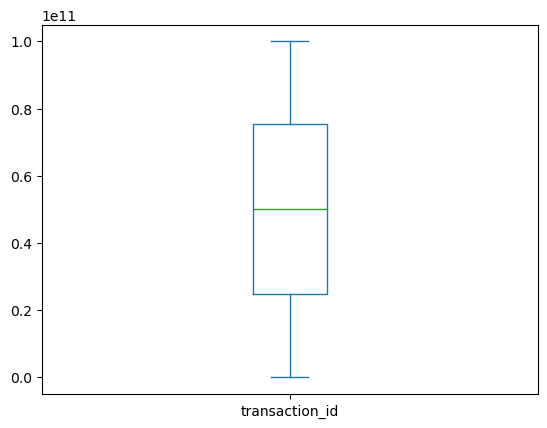

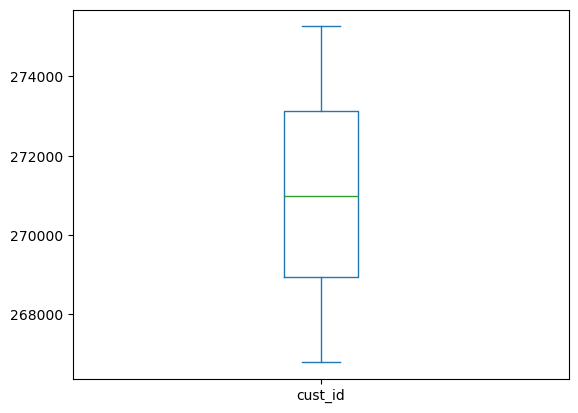

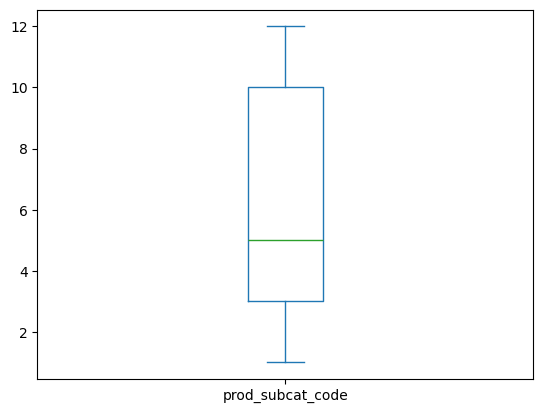

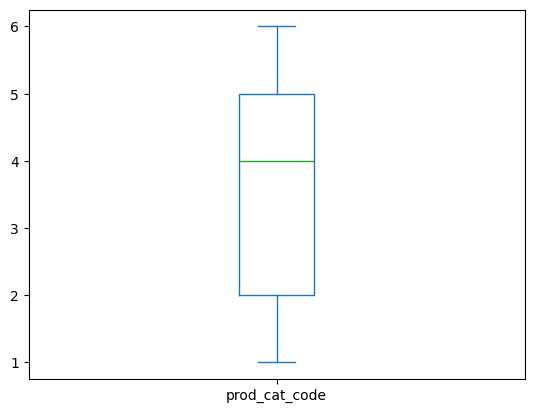

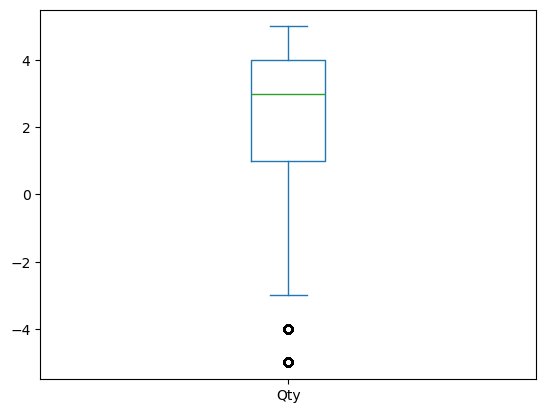

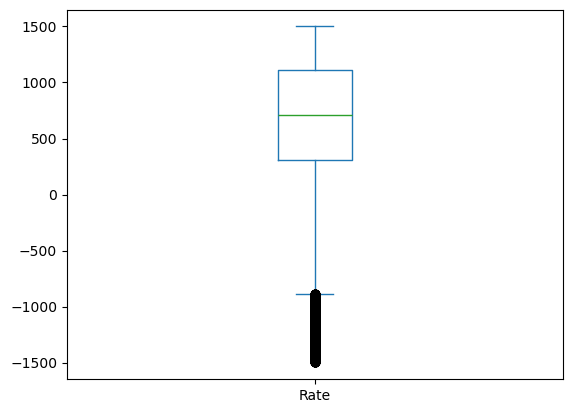

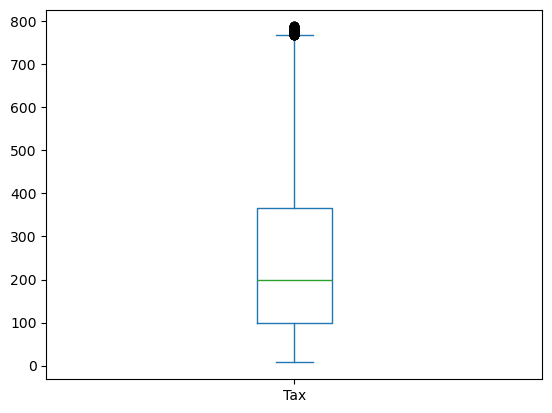

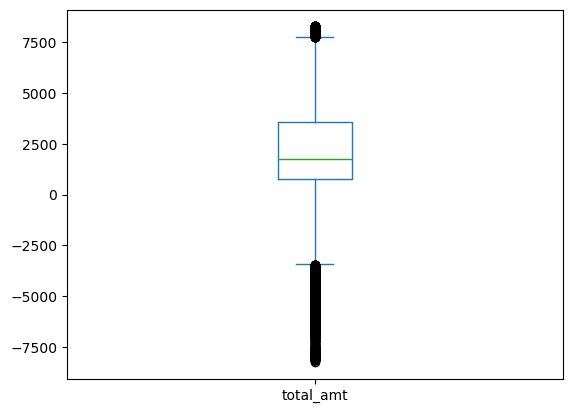

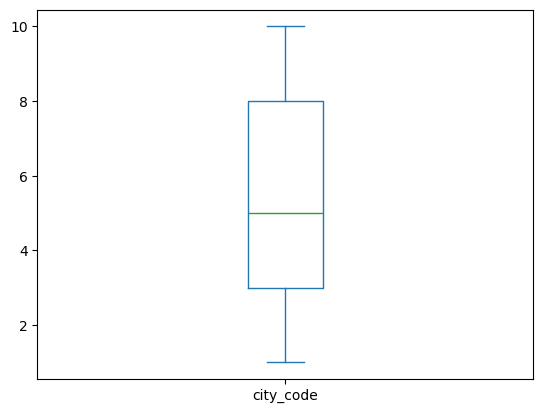

In [61]:
Numeric_columns= Customer_Final_df.select_dtypes('number').columns
for i in Numeric_columns:
    Customer_Final_df[i].plot(kind='box')
    plt.show()

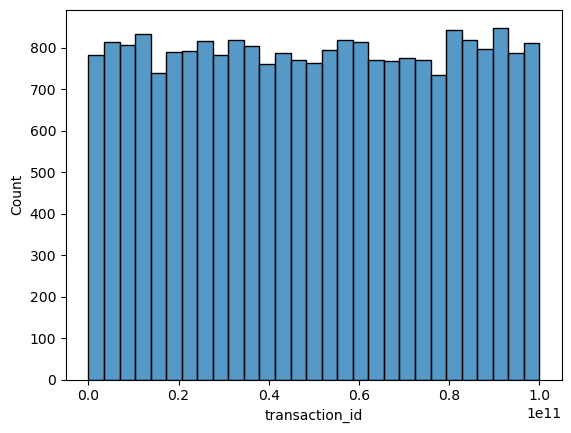

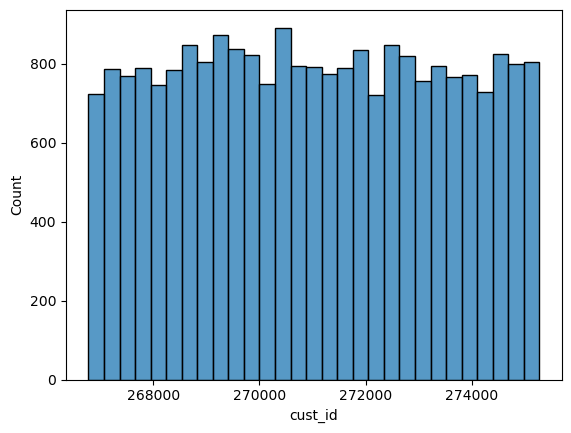

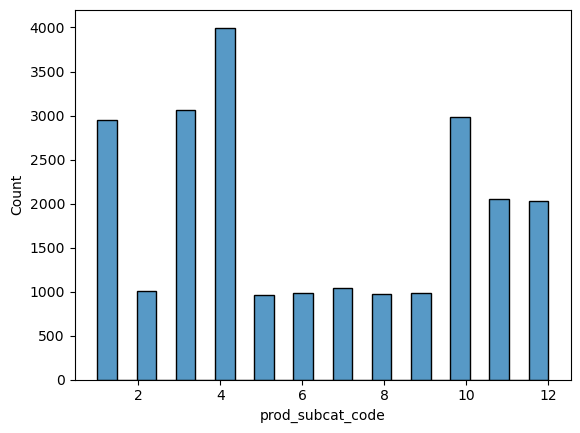

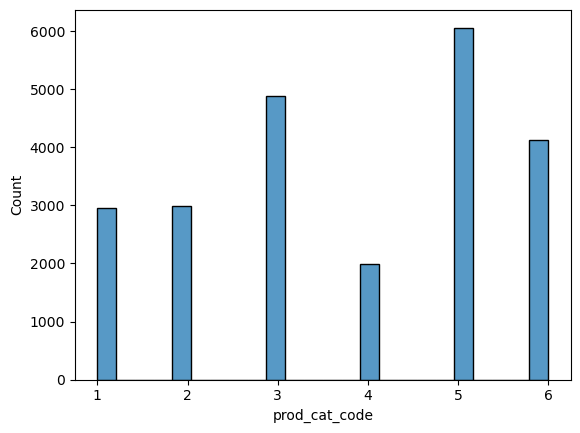

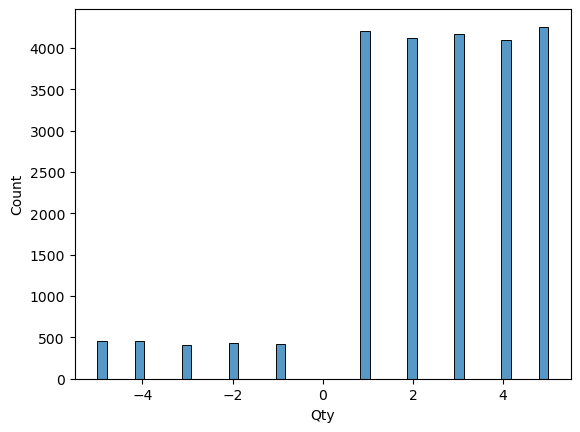

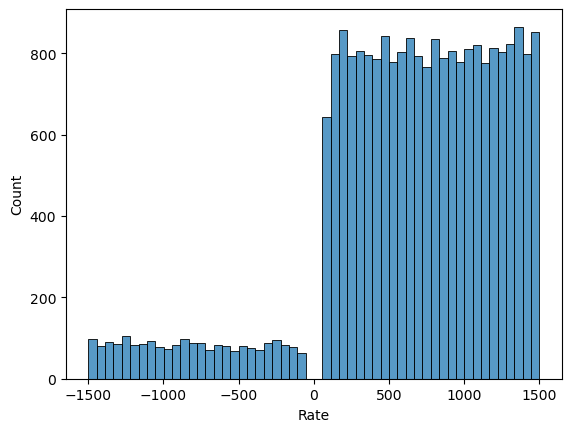

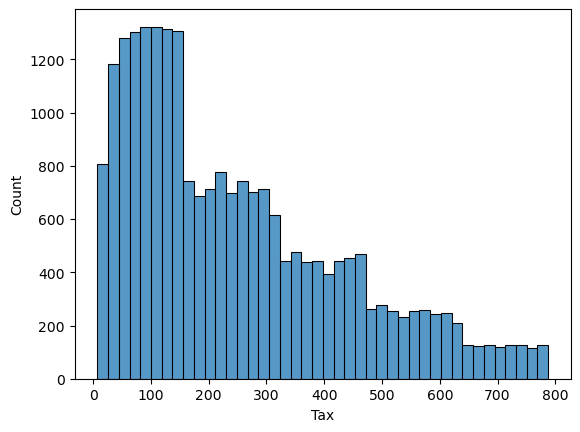

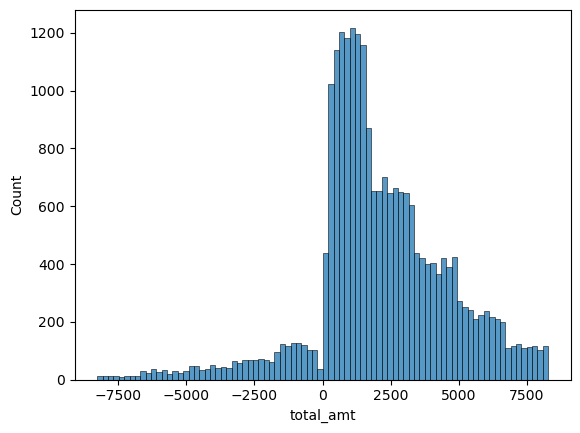

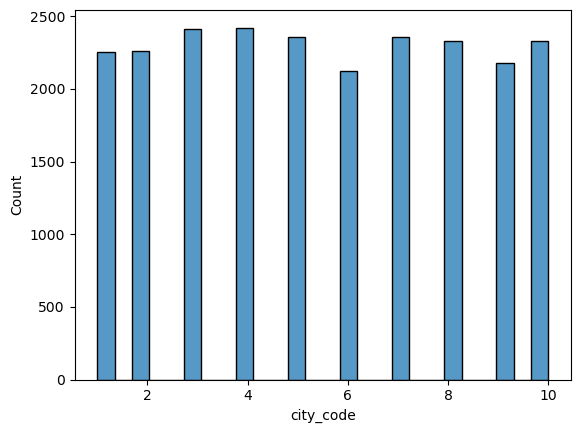

In [63]:
Numeric_columns= Customer_Final_df.select_dtypes('number').columns
for i in Numeric_columns:
    sns.histplot(data= Customer_Final_df, x= Customer_Final_df[i])
    plt.show()

In [68]:
Categorical_columns

Index(['Store_type', 'Gender', 'prod_cat', 'prod_subcat'], dtype='object')

In [72]:
Customer_Final_df.prod_subcat.unique()

array(['Women', 'Computers', 'DIY', 'Bath', 'Personal Appliances',
       'Tools', 'Kids', 'Comics', 'Fiction', 'Academic', 'Mens',
       'Children', 'Cameras', 'Audio and video', 'Kitchen', 'Mobiles',
       'Furnishing', 'Non-Fiction'], dtype=object)

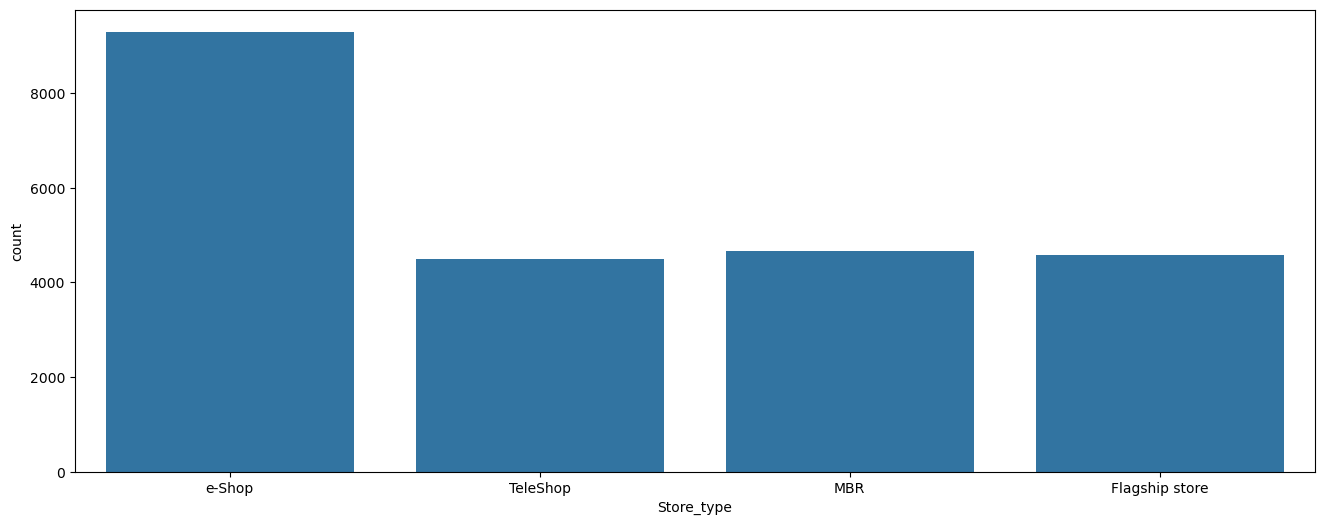

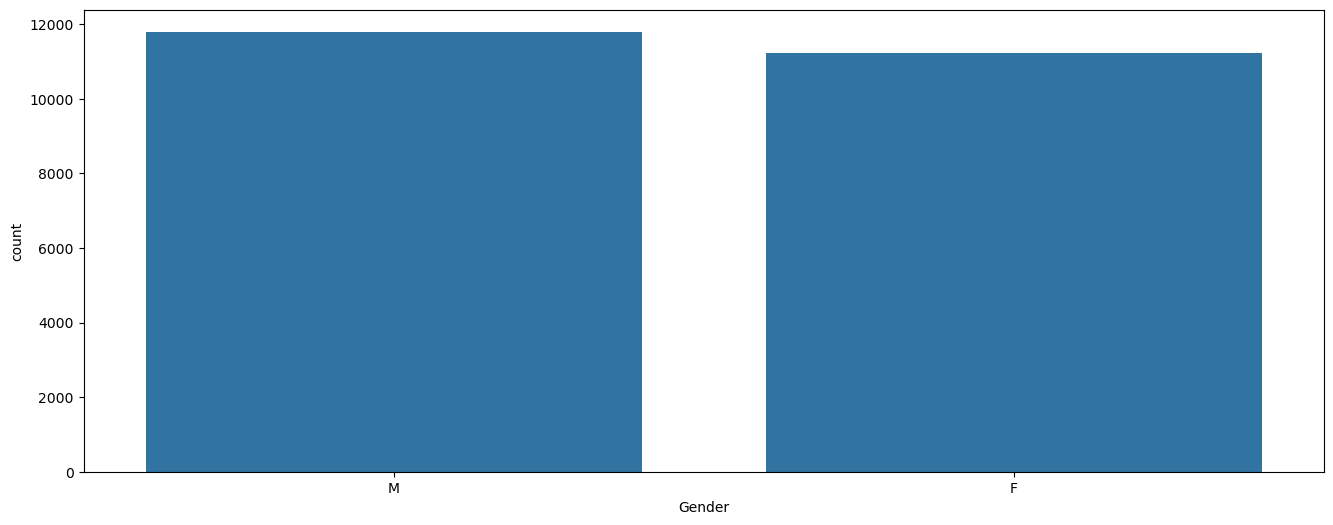

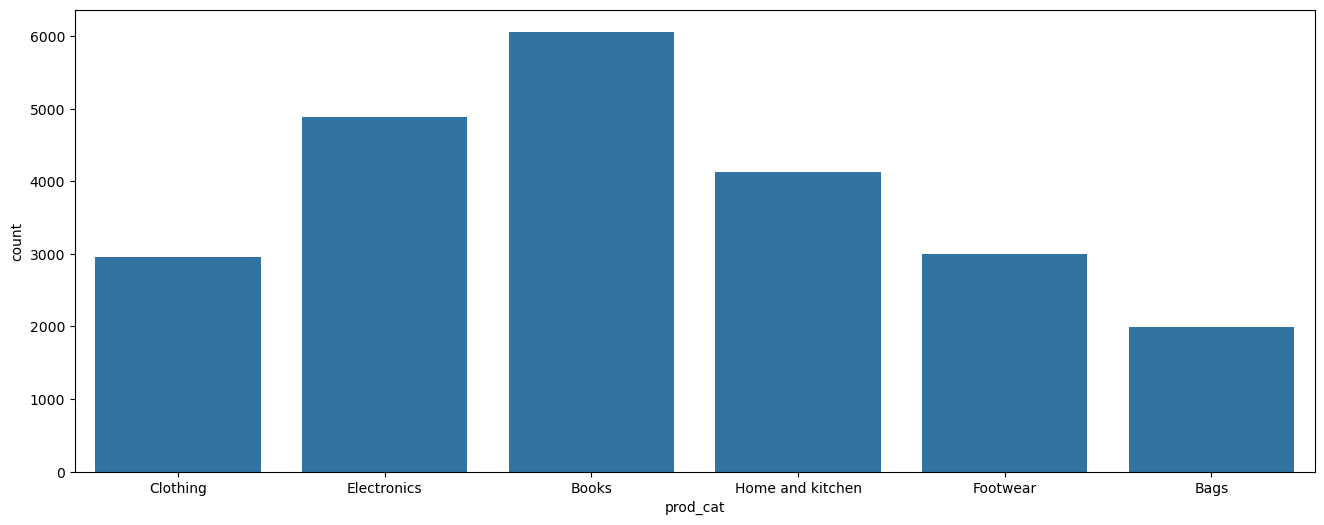

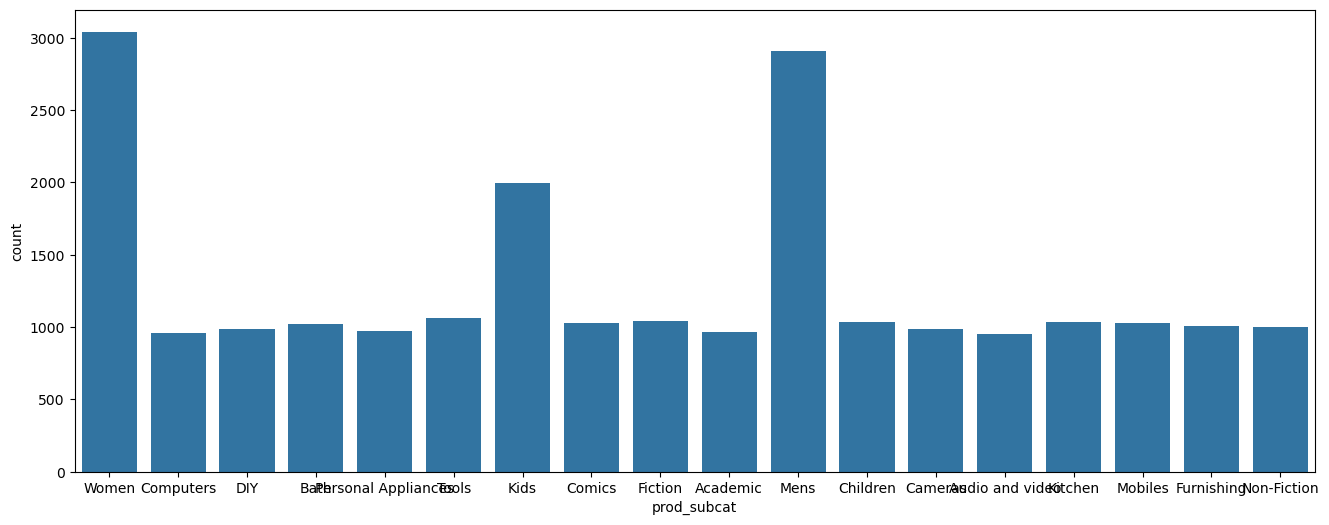

In [82]:
Categorical_columns= Customer_Final_df.select_dtypes(include= 'object').columns
for i in Categorical_columns:
    plt.figure(figsize= (16,6))
    sns.countplot(data= Customer_Final_df, x= i)
    plt.show()

## Bivariate Analysis

In [109]:
Numeric_columns= Customer_Final_df.select_dtypes('number').drop(['transaction_id', 'cust_id'], axis=1)
Numeric_columns.corr()

,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,city_code
prod_subcat_code,1.000000,0.560719,0.005133,0.001024,-0.007266,0.002674,-0.010148
prod_cat_code,0.560719,1.000000,-0.006551,-0.004652,-0.010915,-0.007648,-0.016825
Qty,0.005133,-0.006551,1.000000,0.579961,0.306998,0.791576,-0.008704
Rate,0.001024,-0.004652,0.579961,1.000000,0.367784,0.829637,-0.003246
Tax,-0.007266,-0.010915,0.306998,0.367784,1.000000,0.621860,0.005158
total_amt,0.002674,-0.007648,0.791576,0.829637,0.621860,1.000000,-0.004429
city_code,-0.010148,-0.016825,-0.008704,-0.003246,0.005158,-0.004429,1.000000


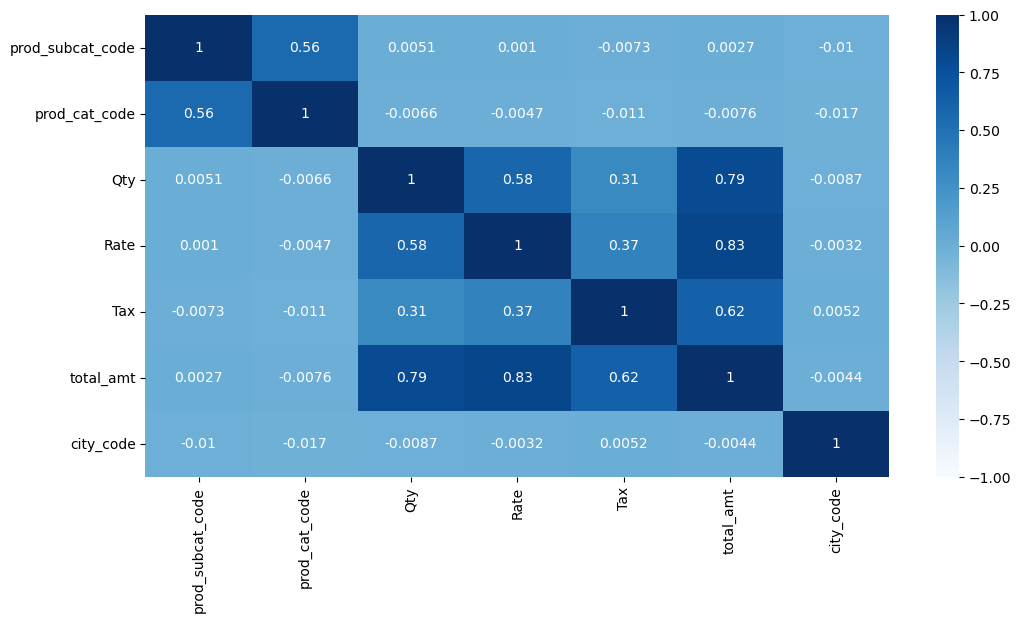

In [111]:
plt.figure(figsize= (12,6))
sns.heatmap(data= Numeric_columns.corr(), annot= True, vmin=-1, vmax= 1, cmap='Blues')
plt.show()